In [83]:
import numpy as np
import matplotlib.pyplot as plt

# if scienceplots is available, use it
try:
    import scienceplots
    plt.style.use('science')
except ImportError:
    print('scienceplots not available, using default style')
    pass


In [84]:
def movingAverage(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

In [85]:
path = "logs/"
path += "240513_121223_SmallGrid"
mapName = "smallGrid"
humanScore = 97

gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)


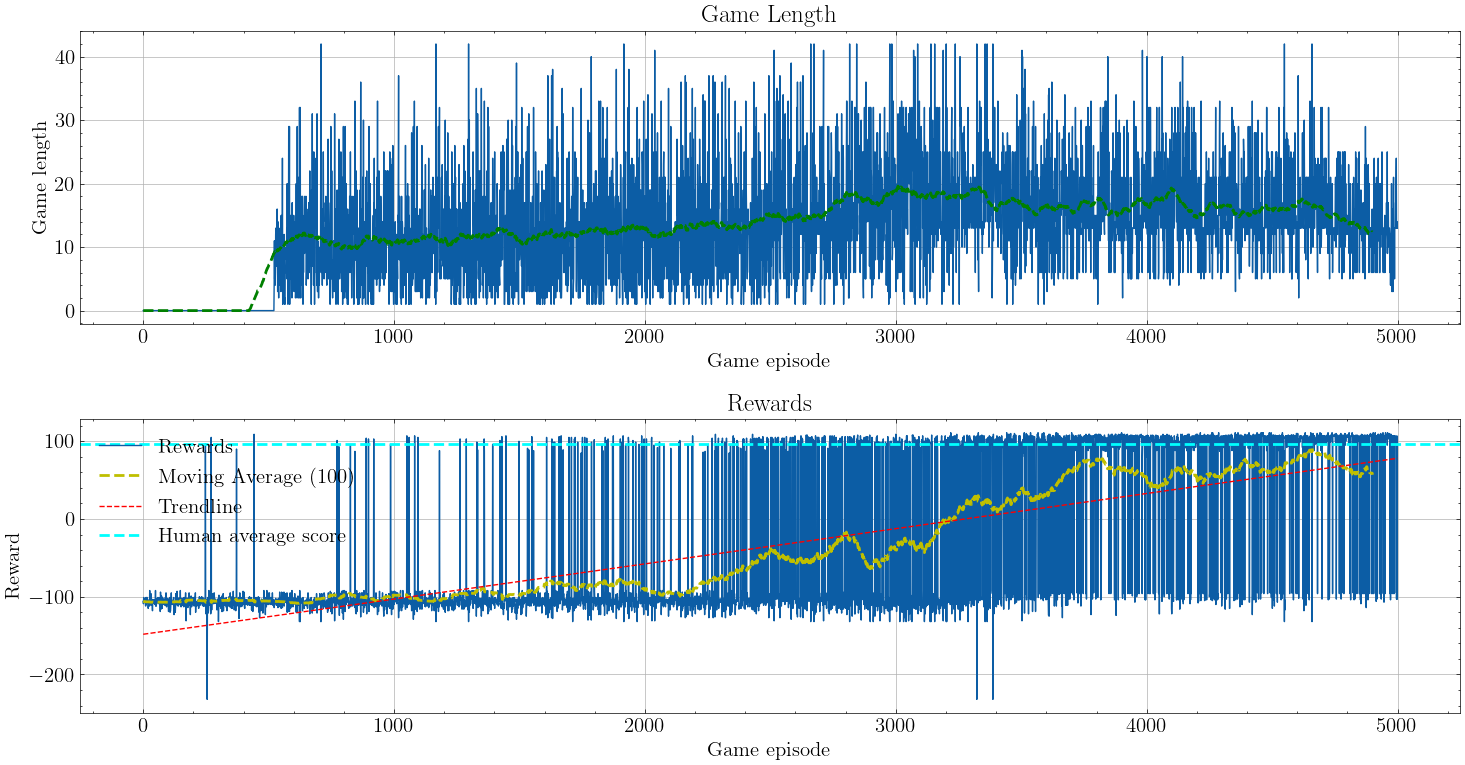

In [86]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLength)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewards, label = 'Rewards')
plt.plot(rewardsMA, 'y--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# trendline
z = np.polyfit(np.arange(len(rewards)), rewards, 1)
p = np.poly1d(z)
plt.plot(p(np.arange(len(rewards))), 'r--', label='Trendline')


## add horizontal line at y=97

plt.axhline(y=humanScore, color="cyan", linestyle='--', linewidth = 2, label="Human average score")

plt.legend()


plt.tight_layout()

# save the plot
# plt.savefig(f"{path}/plot.eps", format="eps")

plt.show()

Mask to only show episodes with reward > 50


In [87]:
# mask the arrays to only contain the element with a reward higher than 50
mask = rewards > 50
gameLengthMasked = gameLength[mask]
rewardsMasked = rewards[mask]

window_size = 100
gameLengthMA = movingAverage(gameLengthMasked, window_size)
rewardsMA = movingAverage(rewardsMasked, window_size)

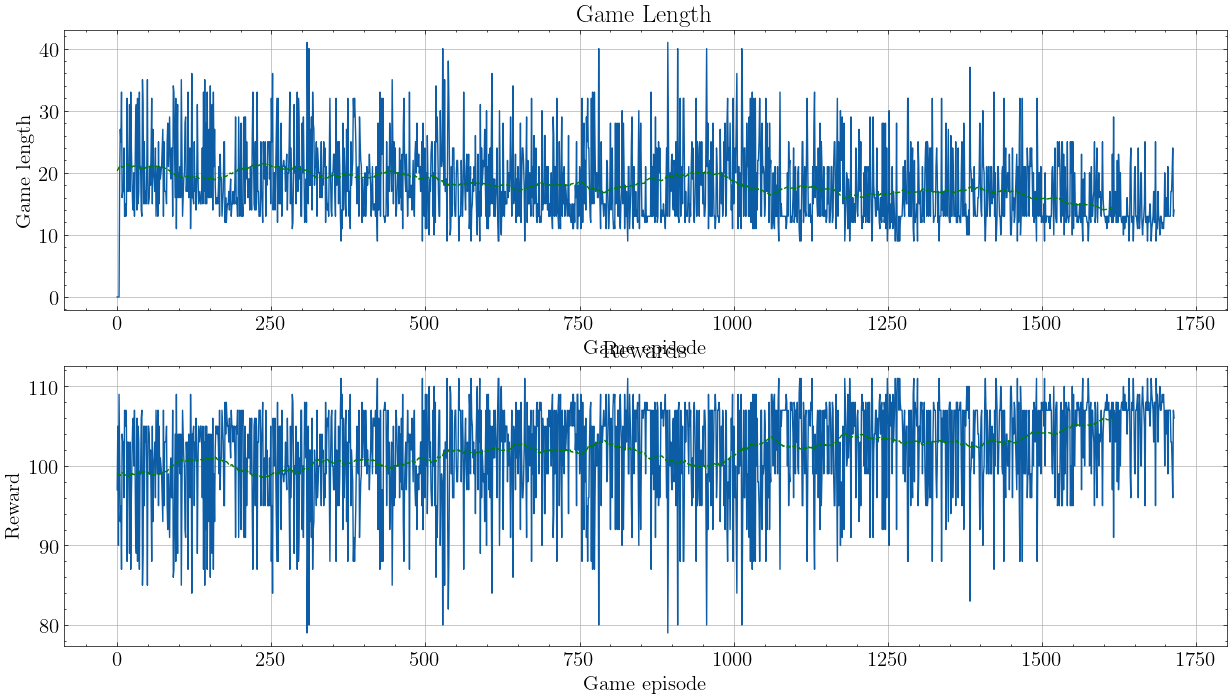

In [88]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLengthMasked)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewardsMasked, label = 'Rewards')
plt.plot(rewardsMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()



Poster Plots


In [89]:
gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)

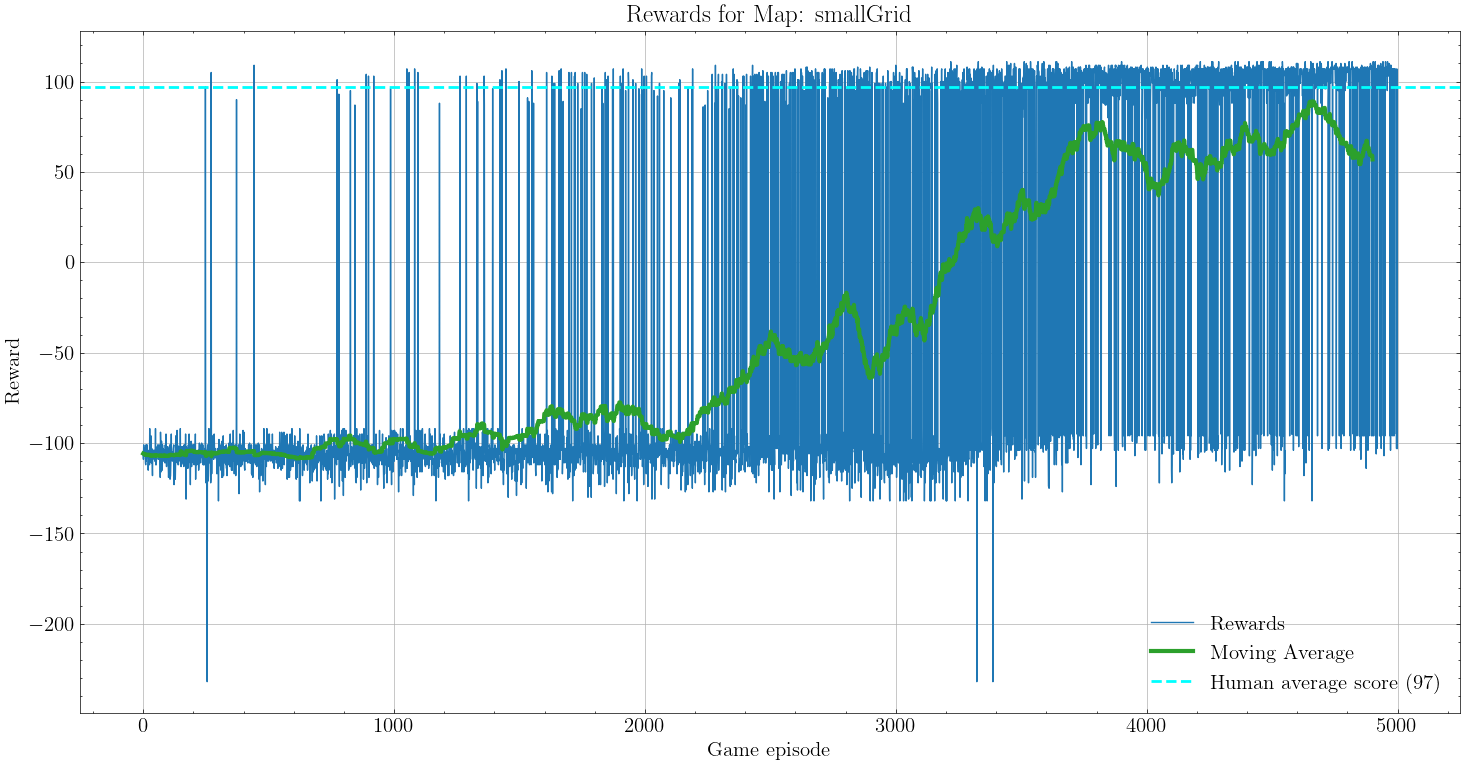

In [90]:
# Plot for Poster

plt.rcParams['font.size'] = 15
plt.figure(figsize=(15, 8))
plt.plot(rewards, 'tab:blue',label = 'Rewards')
plt.plot(rewardsMA, 'tab:green', label=f'Moving Average', linewidth = 3)
plt.title('Rewards for Map: ' + mapName)
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# # trendline
# z = np.polyfit(np.arange(len(rewards)), rewards, 1)
# p = np.poly1d(z)
# plt.plot(p(np.arange(len(rewards))), 'tab:orange', label='Trendline', linewidth = 2)

## add human score
plt.axhline(y=humanScore, color="cyan", linestyle='--', linewidth = 2, label="Human average score" + f" ({humanScore})")

plt.legend()

plt.tight_layout()

# save the plot
plt.savefig(f"{path}/PosterPlot_"+ mapName +".eps", format="eps")

plt.show()

# Plot with the test results


In [91]:
smallGridEvaluationScores = []
mediumGridEvaluationScores = [125.0, 129.0, 129.0, 127.0, 129.0, 125.0, 127.0, 129.0, 125.0, 123.0, 129.0, 127.0, 127.0, 127.0, 129.0, 129.0, 129.0, 129.0, 127.0, 129.0, 127.0, 123.0, 127.0, 129.0, 129.0, 129.0, 127.0, 125.0, 129.0, 127.0, 127.0, 127.0, 129.0, 129.0, 129.0, 129.0, 123.0, 129.0, 127.0, 129.0, 129.0, 129.0, 129.0, 127.0, 123.0, 129.0, 129.0, 125.0, 123.0, 117.0]
smallClassicEvaluationScores = [521.0, 544.0, 133.0, 562.0, 325.0, 371.0, 299.0, 621.0, 613.0, 622.0, 473.0, 554.0, 514.0, 532.0, 610.0, 545.0, 572.0, 646.0, 572.0, 650.0, 638.0, 480.0, 595.0, 591.0, 603.0, 250.0, 860.0, 511.0, 449.0, 182.0, 547.0, 331.0, 482.0, 589.0, 305.0, 390.0, 625.0, 452.0, 931.0, 620.0, 838.0, 110.0, 380.0, 233.0, 471.0, 682.0, 544.0, 454.0, 264.0, 559.0]

def stringToList(string):
    return string.split(", ")

def WinToBinary(array):
    tmp = [1 if x == "Win" else 0 for x in array]
    return np.array(tmp)

smallGridEvaluationWins = []
stringSmallGrid = ""
stringMediumGrid = "Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win, Win"
stringSmallClassic = "Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Win, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Win, Loss, Win, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss"
# convert string to list
smallGridEvaluationWins = stringToList(stringSmallGrid)
mediumGridEvaluationWins = stringToList(stringMediumGrid)
smallClassicEvaluationWins = stringToList(stringSmallClassic)



# convert to np
smallGridEvaluationScores = np.array(smallGridEvaluationScores)
mediumGridEvaluationScores = np.array(mediumGridEvaluationScores)




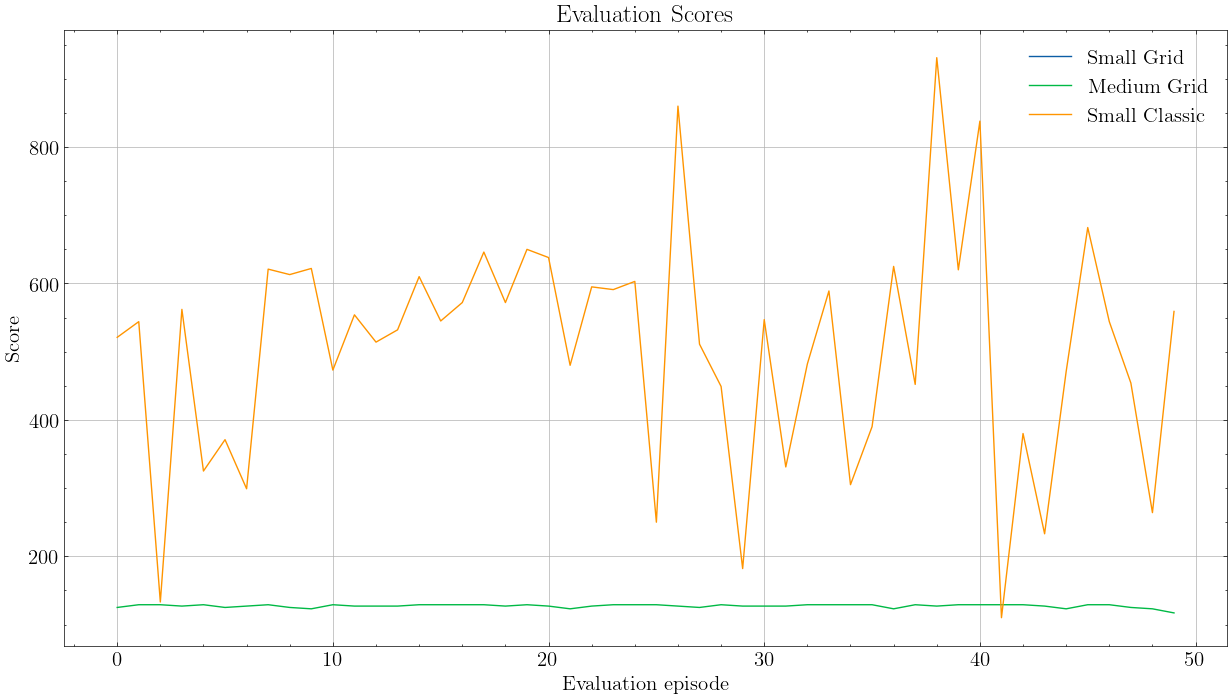

In [92]:
plt.figure(figsize=(15, 8))
plt.plot(smallGridEvaluationScores, label = 'Small Grid')
plt.plot(mediumGridEvaluationScores, label = 'Medium Grid')
plt.plot(smallClassicEvaluationScores, label = 'Small Classic')
plt.title('Evaluation Scores')
plt.xlabel('Evaluation episode')
plt.ylabel('Score')
plt.grid()
plt.legend()



/var/folders/xh/d0hrh7795wx9snbhlr0lyrbr0000gn/T/ipykernel_8283/1241721781.py:12: RuntimeWarning: invalid value encountered in divide
  values = np.array([win_count, loss_count]) / (win_count+loss_count)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


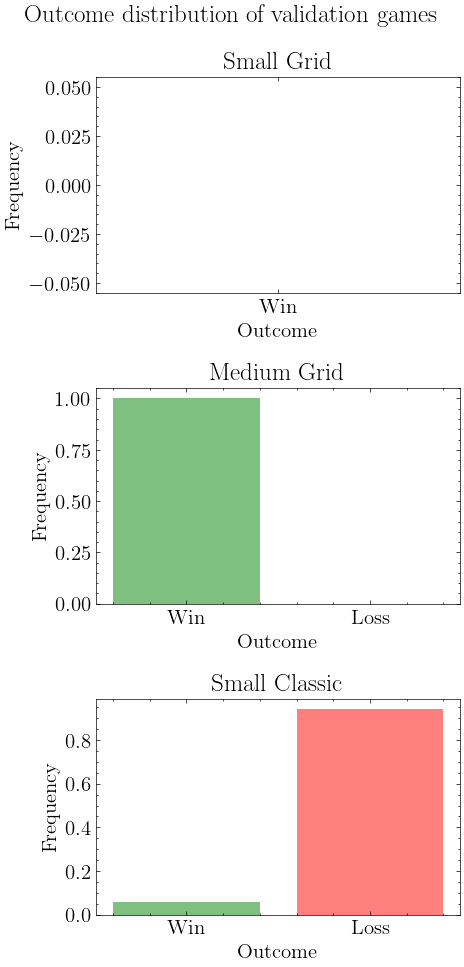

In [93]:
size = 10
ratio = 0.75

plt.figure(figsize=(2*size * (1-ratio),size))
labels = ['Win', 'Loss']

# smallGrid
plt.subplot(311)

win_count = smallGridEvaluationWins.count("Win")
loss_count = smallGridEvaluationWins.count("Loss")
values = np.array([win_count, loss_count]) / (win_count+loss_count)
plt.bar(labels, values, color=['green', 'red'], alpha=0.5)
plt.title('Small Grid')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

# mediumGrid
plt.subplot(312)
win_count = mediumGridEvaluationWins.count("Win")
loss_count = mediumGridEvaluationWins.count("Loss")
values = np.array([win_count, loss_count]) / (win_count+loss_count)
plt.bar(labels, values, color=['green', 'red'], alpha=0.5)
plt.title('Medium Grid')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

# smallClassic
plt.subplot(313)

win_count = smallClassicEvaluationWins.count("Win")
loss_count = smallClassicEvaluationWins.count("Loss")
values = np.array([win_count, loss_count]) / (win_count+loss_count)
plt.bar(labels, values, color=['green', 'red'], alpha=0.5)
plt.title('Small Classic')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

plt.suptitle('Outcome distribution of validation games')

plt.tight_layout()
# save the plot
plt.savefig("logs/EvaluationPlot.eps", format="eps")

plt.show()

Plot for the results of the 3 maps


In [94]:
path = "logs/"
sg_path = path + "240513_121223_SmallGrid"
mg_path = path + "240513_131818_MediumGrid"
sc_path = path + "240513_203022_SmallGrid"

paths = [sg_path, mg_path, sc_path]
humanScores = [97, 112, 697]
mapNames = ["Small Grid", "Medium Grid", "Small Classic"]

rewards = []
movingAverages = []

for path in paths:
    rewards.append(np.load(f"{path}/reward_tracker.npy"))

for reward in rewards:
    window_size = 100
    movingAverages.append(movingAverage(reward, window_size))



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


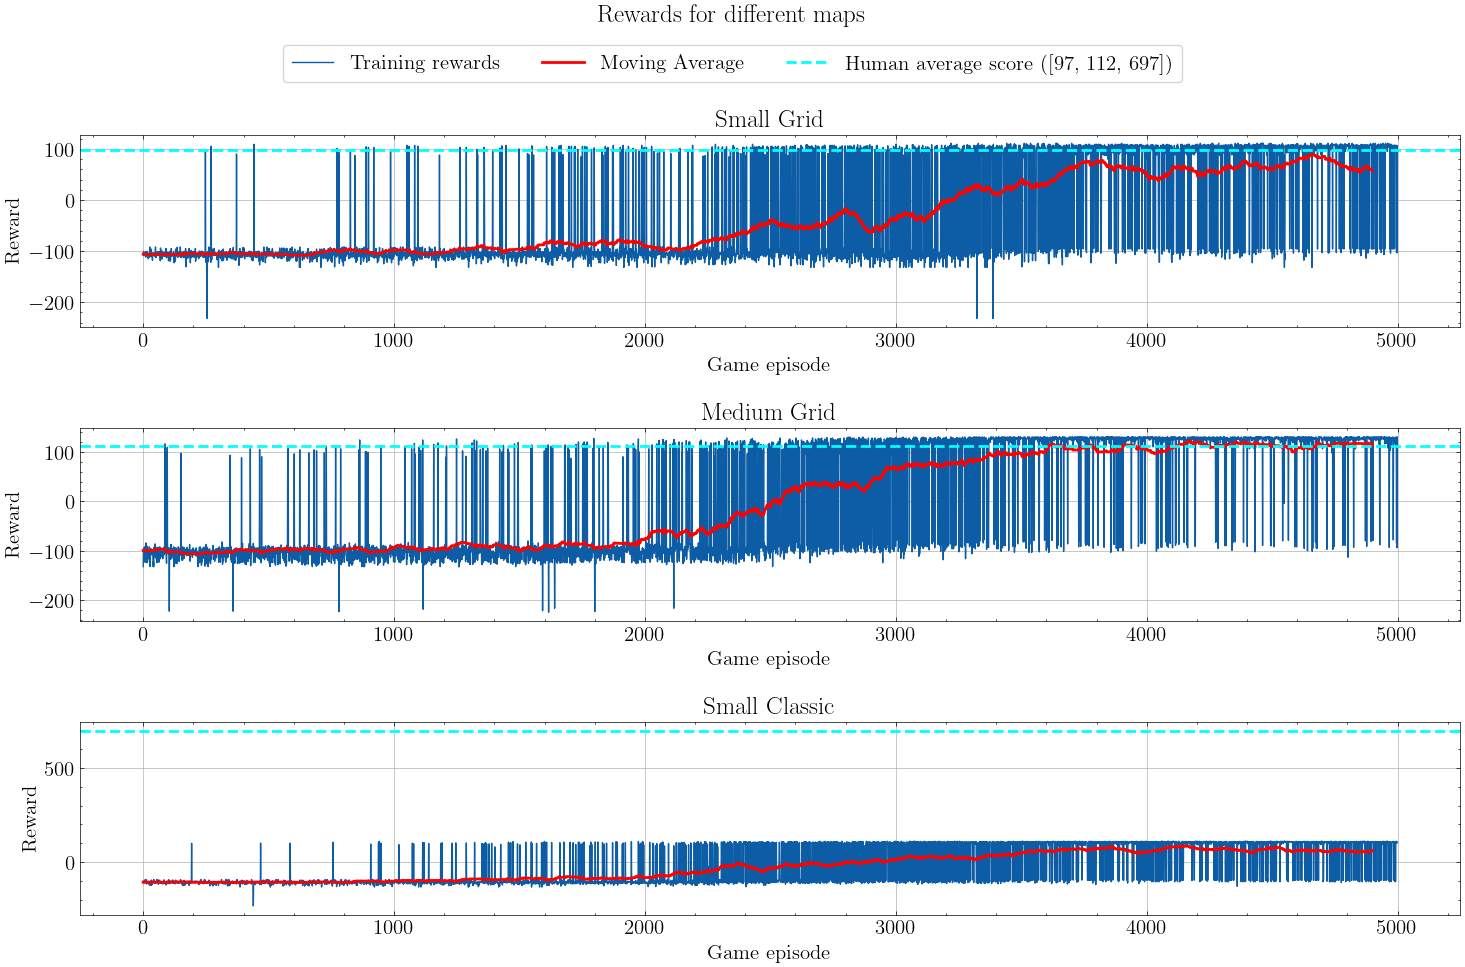

In [95]:

plt.figure(figsize=(2*size * ratio, size))
plt.suptitle('Rewards for different maps')

for i in range(len(rewards)):
    plt.subplot(3, 1, i+1)
    if (i == 0):
        plt.plot(rewards[i], label="Training rewards")
        plt.plot(movingAverages[i], color="red", label='Moving Average', linewidth=2)
        plt.axhline(y=humanScores[i], color="cyan", linestyle='--', linewidth=2, label=f"Human average score ({humanScores})")
    else:
        plt.plot(rewards[i])
        plt.plot(movingAverages[i], color="red" ,linewidth=2)
        plt.axhline(y=humanScores[i], color="cyan", linestyle='--', linewidth=2)

    plt.title(mapNames[i])
    plt.xlabel('Game episode')
    plt.ylabel('Reward')
    plt.grid()

    

plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fancybox=True, frameon=True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.subplots_adjust(top=0.85)

plt.savefig("logs/AllMapsPlot.eps", format="eps")
plt.show()
